## Data and Description

Energy can be produced from wind using windmills. Choosing a site for a wind farm (i.e. the location of the windmills), however, can be a multi-million dollar gamble. If wind is inadequate at the site, then the energy produced over the lifetime of the wind farm can be much less than the cost of building the operation. Hence, accurate prediction of wind speed at a candidate site can be an important component in the decision to build or not to build. Since energy produced varies as the square of the wind speed, even small errors in prediction can have serious consequences.

One possible solution to help predict wind speed at a candidate site is to use wind speed at a nearby reference site. A reference site is a nearby location where the wind speed is already being monitored and should, theoretically, be similar to the candidate site. Using information from the reference site will allow windmill companies to know the wind speed at the candidate site without going through a costly data collection period, if the reference site is a good predictor.

The Windmill data set contains measurements of wind speed (in meters per second m/s) at a **candidate site (CSpd) (column 1)** and at an accompanying **reference site (RSpd) (column 2)** for 1,116 areas. Download the Windmill.txt file from Canvas, and put it in the same folder as this R Markdown file.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

#### 1. Briefly explain why simple linear regression is an appropriate tool to use in this situation.


Simple linear regression is a good tool for this because it has one explanatory variable.

#### 2. Read in the data set, and call the dataframe "wind". Print a summary of the data and make sure the data makes sense.

In [ ]:
wind = pd.read_table("/content/Windmill.txt", delimiter=' ')
wind.head()
#wind.describe()

,CSpd,RSpd
0,6.9,5.9666
1,7.1,7.2176
2,7.8,7.9405
3,6.9,6.0174
4,5.5,6.1646


#### 3. What is the outcome variable in this situation? (Think about which variable makes the most sense to be the response.)



The outcome variable is wind speed at the candidate site.

#### 4. What is the explanatory variable in this situation?


Wind speed at the reference site.

#### 5. Create a scatterplot of the data with variables on the appropriate axes. Make the plot square. Add descriptive axis labels with appropriate units. Save the plot to a variable and print the plot.

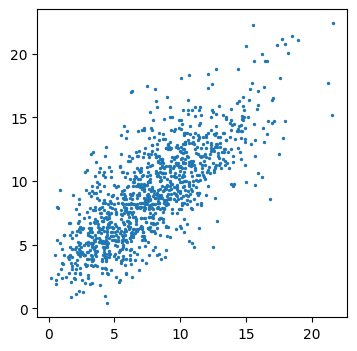

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.scatter(x = wind['RSpd'], y = wind['CSpd'], s = 2)
plt.show()

#### 6. Briefly describe the relationship between RSpd and CSpd. (Hint: you should use 3 key words in a complete setence that includes referencing the variables.)


The two variables have a moderately strong positive correlation. This means it can be assumed that as wind speed increases at the reference site (our explanatory variable), the wind speed will also increase at our candidate site.

#### 7. Calculate the correlation coefficient for the two variables (you may use a built-in Python function). Print the result.

In [ ]:
corr_matrix = wind.corr()
#print(corr_matrix)
corr_matrix.loc['CSpd','RSpd']

0.755594790599378

#### 8. Briefly interpret the number you calculated for the correlation coefficient (what is the direction and strength of the correlation?).



The correlation coefficient of 0.755 denotes that there is a strong positive corellation between the variables. This means that as the wind speed at the reference site increases, the 76% of the variability around an increase in wind speed at the candidate site can be explained.

#### 9. Mathematically write out the theoretical/general simple linear regression model for this data set (using parameters ($\beta$'s), not estimates, and not using matrix notation). Clearly explain which part of the model is deterministic and which part is random. Do not use "x" and "y" in your model - use variable names that are fairly descriptive.

$\text{CSpd}_i$ = $\beta_0$ + $\beta_1$ $\times$ $\text{RSpd}_i$ + $\epsilon_i$

Deterministic > $\beta_0$ + $\beta_1$ $\times$ $\text{RSpd}_i$

Random > $\epsilon_i$

#### 10. Add the OLS regression line to the scatterplot you created in 4. Print the result. (Hint: use `np.polyfit`)


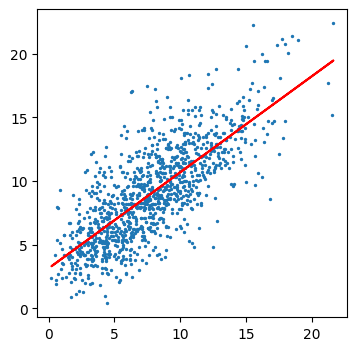

In [ ]:
x, y = wind['RSpd'], wind['CSpd']
b1, b0 = np.polyfit(x, y, 1)
#print(b1); print(b0)
fig = plt.figure(figsize=(4, 4))
plt.scatter(x, y, s = 2)
plt.plot(x, b1 * x + b0, 'r')
plt.show()

#### 11. (a) Apply linear regression to the data. (b) Print out a summary of the results from the `lm` function. (c) Save the residuals and fitted values to the `wind` dataframe. (d) Print the first few rows of the `wind` dataframe.

In [ ]:
# Prepare data
y = wind['CSpd']
X = sm.add_constant(wind['RSpd'])
print(X)

      const     RSpd
0       1.0   5.9666
1       1.0   7.2176
2       1.0   7.9405
3       1.0   6.0174
4       1.0   6.1646
...     ...      ...
1111    1.0  18.5025
1112    1.0  21.2215
1113    1.0  10.9579
1114    1.0  10.0234
1115    1.0   5.6299

[1116 rows x 2 columns]


In [ ]:
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   CSpd   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1482.
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          6.63e-207
Time:                        19:10:18   Log-Likelihood:                -2589.9
No. Observations:                1116   AIC:                             5184.
Df Residuals:                    1114   BIC:                             5194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1412      0.170     18.524      0.0

In [ ]:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 

In [ ]:
wind['residuals'] = res.resid
wind['fittedvalues'] = res.fittedvalues
wind.head()

,CSpd,RSpd,residuals,fittedvalues
0,6.9,5.9666,-0.750391,7.650391
1,7.1,7.2176,-1.495813,8.595813
2,7.8,7.9405,-1.342133,9.142133
3,6.9,6.0174,-0.788782,7.688782
4,5.5,6.1646,-2.300026,7.800026


#### 12. Briefly explain the rational behind the ordinary least-squares model fit (how does OLS choose the parameter estimates?).

The OLS model finds the parameter estimates by squaring each residual and measuring the distance between each residual and the OLS line. It continues doing this until it's found the linear model that minimizes each of these distances the most.

#### 13. Mathematically write out the fitted simple linear regression model for this data set using the coefficients you found above (do not use parameters/$\beta$'s and do not use matrix notation). Do not use "x" and "y" in your model - use variable names that are fairly descriptive.

$\text{CSpd}_i$ = $3.14$ + $0.76$$\text{RSpd}_i$ + $\epsilon_i$

#### 14. Interpret the coefficient for the slope.

When the wind speed at the reference site increases by 1, the wind speed at the candidate site increases by an average of 0.76.

#### 15. Interpret the coefficient for the intercept.

When the wind speed at the reference site is zero, the wind speed at the candidate site is 3.14.

#### 16. What is the average wind speed at the candidate site (CSpd) when the wind speed at the reference site (RSpd) is 12 m/s? Show your code, and print the result.

In [ ]:
windspeed = round(3.14 + (0.76 * 12), 2)
print(windspeed , " m/s")

12.26  m/s


#### 17. Briefly explain why it would be wrong to answer this question: What is the average wind speed at the candidate site (CSpd) when the wind speed at the reference site (RSpd) is 25 m/s?

The collected data doesn't go far enough to explain a trend of wind speeds that high. The highest I would feel good about estimating is when the wind speeds a the candidate site are 15 m/s.

#### 18. Calculate the estimate of $\sigma^2$, the average squared variability of the residuals around the line. Show your code, and print the result.

In [ ]:
resids = wind['CSpd'] - wind['fittedvalues']
#resids.head()
sum(res.resid**2) / (res.df_resid)

6.0823116425499375

#### 19. Briefly summarize what you learned, personally, from this analysis about the statistics, model fitting process, etc.

There are a lot of steps! It's super important to keep track of which variables are representing what, and labeling numbers so they have context.

#### 20. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways.

1) This dataset is meant to take the estimates of our reference site, and use it to estimate the performance of windmills at our candidate site. This analysis showed that if we build a similar installation at the new site, the wind speeds will be similar to the reference site 76% of the time. When the wind is slow at the reference site, it's a little faster at the candidate site, and when it's fast at the reference site, it's a little slower at the candidate site. If provided with data on the energy production of the candidate site (within the same timeframe as our existing data), my team may be able to predict energy production of the candidate site.